## Машинное обучение, ФКН ВШЭ

## Практическое задание 4

### Общая информация
Дата выдачи: 12 октября 2018

Мягкий дедлайн: 7:59MSK 20 октября 2018 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 21 октября 2018.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-04-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-04-IvanovIvan.ipynb).

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

** Оценка:** ...

In [1]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [2]:
X, y = make_classification(n_samples=100000, n_features=20,
                                    n_informative=10, n_redundant=10,
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(2 балла)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [3]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train)

C:\Users\Ekaterina\Anaconda3\envs\tens\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

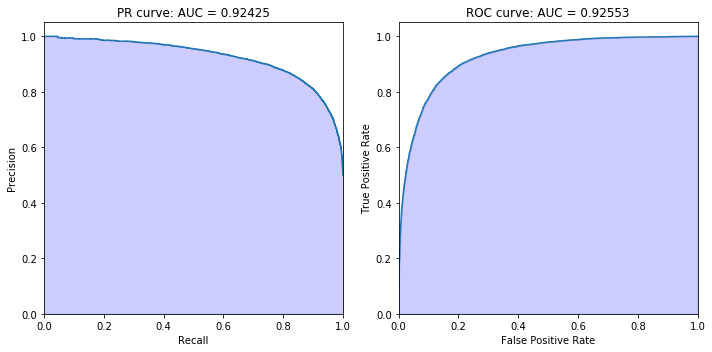

In [4]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

y_score = clf.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)
pr_auc = auc(recall, precision)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.step(recall, precision)
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve: AUC = {}'.format(round(pr_auc, 5)))

plt.subplot(1, 2, 2)
plt.step(fpr, tpr)
plt.fill_between(fpr, tpr, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('ROC curve: AUC = {}'.format(round(roc_auc, 5)))

plt.tight_layout()

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками, обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

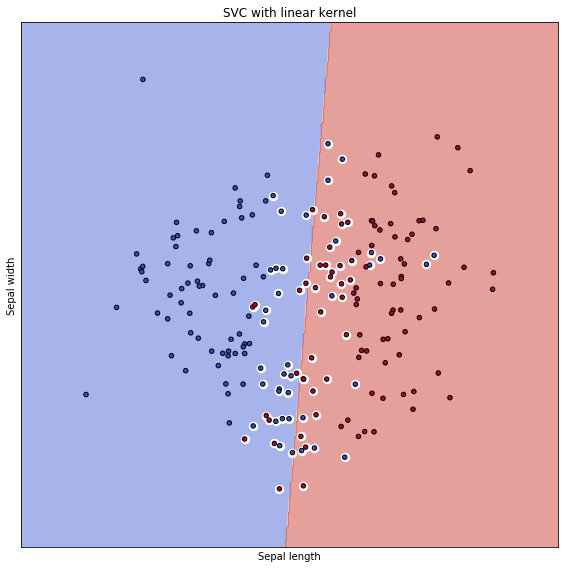

In [5]:
from sklearn.svm import SVC

X_new, y_new = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)
clf = SVC(kernel='linear')
clf.fit(X_new, y_new)

X0, X1 = X_new[:, 0], X_new[:, 1]
x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(8, 8))
ax = plt.gca()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
sv = clf.support_vectors_
x0, x1 = sv[:, 0], sv[:, 1]
ax.scatter(x0, x1, c='w', s=70)
ax.scatter(X0, X1, c=y_new, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_title('SVC with linear kernel')

plt.tight_layout()

__Задание 2.__ Калибровка вероятностей.

__(2 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [6]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append((y_test[(preds >= l) & (preds < r)] == 1).sum() / ((preds >= l) & (preds < r)).sum())
    plt.plot(bin_middle_points, bin_real_ratios)

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)

lr_preds = lr.predict_proba(X_test)[:, 1]
lsvc_preds = lsvc.decision_function(X_test)
var = max(abs(lsvc_preds.min()), lsvc_preds.max())
lsvc_preds = lsvc_preds / (2 * var) + 0.5

C:\Users\Ekaterina\Anaconda3\envs\tens\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ekaterina\Anaconda3\envs\tens\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Ekaterina\Anaconda3\envs\tens\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in long_scalars


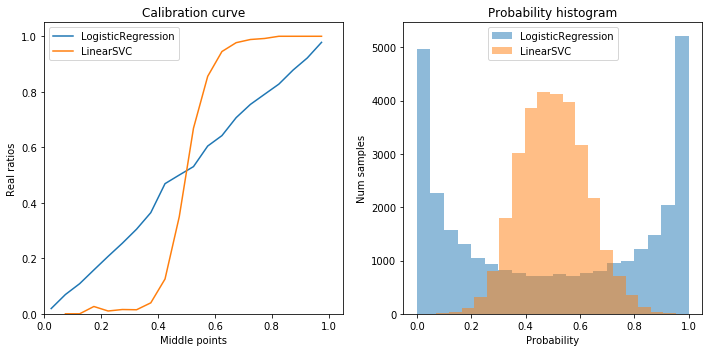

In [8]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_calibration_curve(y_test, lr_preds)
plot_calibration_curve(y_test, lsvc_preds)
plt.legend(['LogisticRegression', 'LinearSVC'])
plt.xlabel('Middle points')
plt.ylabel('Real ratios')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Calibration curve')

plt.subplot(1, 2, 2)
plt.hist(lr_preds, bins=20, alpha=0.5)
plt.hist(lsvc_preds, bins=20, alpha=0.5)
plt.legend(['LogisticRegression', 'LinearSVC'])
plt.title('Probability histogram')
plt.xlabel('Probability')
plt.ylabel('Num samples')
plt.tight_layout()

Ответ: Метод LinearSVC.decision_function() возвращает расстояние от элементов до разделительной полосы, а здесь нам нужны были вероятности. Поэтому я линейно преобразовала значения расстояний так, чтобы они попадали в отрезок [0, 1] и расстояние 0 соответствовало вероятности 0.5, поскольку по-умному (нелинейно), через CalibratedClassifierCV это нужно сделать в следующем пункте.
Таким образом, распределения вероятностей различаются тем, что в логистической регрессии они имеют наибольшую плотность на концах отрезка, а в методе опорных векторов посередине. Это объясняется тем, что большиство примеров тестовой выборки лежит близко к разделяющей полосе и при линейном преобразовании расстояния в вероятность, она будет близка к 0.5.

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

C:\Users\Ekaterina\Anaconda3\envs\tens\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Ekaterina\Anaconda3\envs\tens\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ekaterina\Anaconda3\envs\tens\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ekaterina\Anaconda3\envs\tens\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


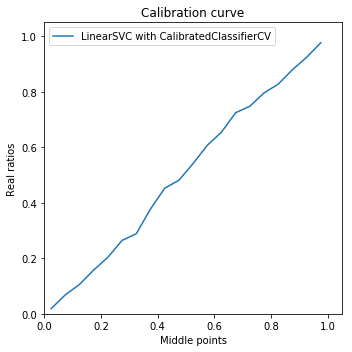

In [9]:
from sklearn.calibration import CalibratedClassifierCV

lsvc_calibrated = CalibratedClassifierCV(LinearSVC())
lsvc_calibrated.fit(X_train, y_train)
lsvc_calibrated_preds = lsvc_calibrated.predict_proba(X_test)[:, 1]
plt.figure(figsize=(5, 5))
plot_calibration_curve(y_test, lsvc_calibrated_preds)
plt.legend(['LinearSVC with CalibratedClassifierCV'])
plt.xlabel('Middle points')
plt.ylabel('Real ratios')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Calibration curve')
plt.tight_layout()

Ответ: Да, калибровочная прямая стала лучше, теперь она гораздо ближе к диагонали.

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 2. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные с прошлогоднего конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [49]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [50]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=42)

__Задание 0.__ Посчитайте качество (в этом задании будем работать ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [13]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_score = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC-AUC = ', roc_auc)

C:\Users\Ekaterina\Anaconda3\envs\tens\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC-AUC =  0.6252554719396581


__Задание 1.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(1 балл)__

In [43]:
import time

for c in data.columns:
    if c.find("cat") != -1:
        data[c] = data[c].astype('category')
    
data_onehot = pd.get_dummies(data.copy())

X_train_onehot, X_test_onehot, _, _ = train_test_split(data_onehot, target, test_size=0.5, random_state=42)
lr = LogisticRegression()
t = time.clock()
lr.fit(X_train_onehot, y_train)
t = time.clock() - t
print('Time to fit model: ', t, 'seconds')
y_score = lr.predict_proba(X_test_onehot)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC-AUC = ', roc_auc)

C:\Users\Ekaterina\Anaconda3\envs\tens\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Time to fit model:  28.278172963648103 seconds
ROC-AUC =  0.6335598022657586


Ответ: значение метрики ROC-AUC возросло.

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 2.__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущим экспериментов. Заметили ли вы что-то интересное?

__(2 балла)__

In [46]:
data_count = pd.DataFrame()
for c in data.columns:
    d = (data[c].values.copy()).astype(np.float64)
    if c.find("cat") != -1:
        vs = np.unique(d)
        for v in vs:
            d[d == v] = ((d == v) & (target == 1)).sum() / (d == v).sum()
    data_count[c] = pd.Series(d)

X_train_count, X_test_count, _, _ = train_test_split(data_count, target, test_size=0.5, random_state=42)
lr = LogisticRegression()
t = time.clock()
lr.fit(X_train_count, y_train)
t = time.clock() - t
print('Time to fit model: ', t, 'seconds')
y_score = lr.predict_proba(X_test_count)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC-AUC = ', roc_auc)

C:\Users\Ekaterina\Anaconda3\envs\tens\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Time to fit model:  13.620000726397848 seconds
ROC-AUC =  0.630734622356917


Ответ: значение метрики осталось практически таким же, а время обучения уменьшилось почти в 2 раза.

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__Задание 3.__ Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.

__(1 балл)__

__(Бонусная часть)__ Посчитайте корректные счётчики первым или вторым способов из описанных выше (не забудьте добавить и шум). 

__(+0.5 балла)__

In [47]:
noise = np.random.normal(0, 0.1, data.values.shape)
for i in range(len(data.columns)):
    c = data.columns[i]
    if c.find("cat") == -1:
        noise[i] = 0

data_count = data_count + noise

X_train_count, X_test_count, _, _ = train_test_split(data_count, target, test_size=0.5, random_state=42)
lr = LogisticRegression()
t = time.clock()
lr.fit(X_train_count, y_train)
t = time.clock() - t
print('Time to fit model: ', t, 'seconds')
y_score = lr.predict_proba(X_test_count)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC-AUC = ', roc_auc)

C:\Users\Ekaterina\Anaconda3\envs\tens\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Time to fit model:  10.579308002954349 seconds
ROC-AUC =  0.6138793984879278


Ответ: теперь качество модели снизилось, поскольку был добавлен шум. Зато модель не переобучена из-за использования счётчиков.

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 4.__ Добавьте сглаживание, описанное выше и повторите эксперименты.

__(2 балла)__

In [53]:
global_mean = target.mean()
C = 10
data_count = pd.DataFrame()
for c in data.columns:
    d = (data[c].values.copy()).astype(np.float64)
    if c.find("cat") != -1:
        vs = np.unique(d)
        for v in vs:
            d[d == v] = (((d == v) & (target == 1)).sum() + C * global_mean) / ((d == v).sum() + C)
    data_count[c] = pd.Series(d)
    
X_train_count, X_test_count, _, _ = train_test_split(data_count, target, test_size=0.5, random_state=42)
lr = LogisticRegression()
t = time.clock()
lr.fit(X_train_count, y_train)
t = time.clock() - t
print('Time to fit model: ', t, 'seconds')
y_score = lr.predict_proba(X_test_count)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC-AUC = ', roc_auc)

C:\Users\Ekaterina\Anaconda3\envs\tens\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Time to fit model:  21.195763869211078 seconds
ROC-AUC =  0.6307445604382065


__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

__Ответ:__ Использование счётчиков не изменяет размер данных, тогда как после one-hot-кодирования размер данных сильно возврастает и может не помещаться в оперативную память. Так же с увеличеснием размера исходных данных увеличивается время обучения модели и тестирования. Счетчики дают численные признаки, а не бинарные. При использовании счётчиков, по крайней мере на предложенном наборе данных, метрика ROC-AUC выше.

**Задание 5.** Какой лучший мем в 2k18?

__Ответ:__ ...


**Задание 6.** Поделитесь лучшим стикерпаком. Только там не должно быть преподавателей и ассистентов этого курса.

__Ответ:__ ...

## Часть 3 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

__Задание 1.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__
- несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ